In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import spacy


# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


# Initializing
---

In [2]:
train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
sample = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [3]:
train.shape

(7613, 5)

In [4]:
info = pd.DataFrame(index = train.columns,columns = ['unique','null','% null'])
unique = train.apply(pd.Series.nunique)
nulls = train.isnull().sum()
info['unique'] = unique
info['null']= nulls
info['% null'] = round((nulls/len(train))*100,2)
info

,unique,null,% null
id,7613,0,0.00
keyword,221,61,0.80
location,3341,2533,33.27
text,7503,0,0.00
target,2,0,0.00


In [5]:
df = train.copy(deep= True)
df['keyword'].fillna('no_keyword', inplace=True)
df['location'].fillna('no_location', inplace=True)

<AxesSubplot:xlabel='text', ylabel='keyword'>

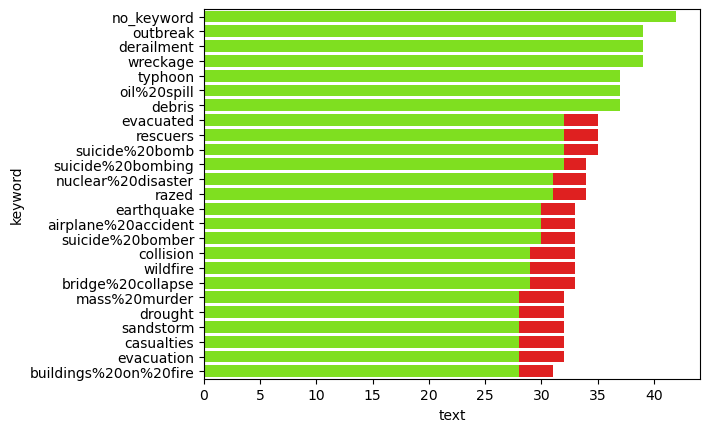

In [6]:
keyword_fake = df[df['target'] == 0].groupby('keyword').count().drop(columns=['target', 'id']).sort_values(by='text', ascending=False)[:25]
keyword_real = df[df['target'] == 1].groupby('keyword').count().drop(columns=['target', 'id']).sort_values(by='text', ascending=False)[:25]

sns.barplot(data=keyword_fake,y=keyword_real.index, x = 'text',color='red',) #number of fake tweets
sns.barplot(data=keyword_real,y=keyword_real.index, x = 'text',color='chartreuse')#number of real tweets

In [7]:
#nltk tags
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

# Cleaning
---
* nltk?
* keep '@' '#' these are important for tweets

In [8]:
#remove stop words
sample_text = df.text.loc[700]
text_tokens = word_tokenize(sample_text)
print(sample_text)
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]
print(tokens_without_sw)

@bekah__w thanks! I sweat bullets every time I get in with this blazing sun beating down on me.
['@', 'bekah__w', 'thanks', '!', 'I', 'sweat', 'bullets', 'every', 'time', 'I', 'get', 'blazing', 'sun', 'beating', '.']


In [9]:
tagged = nltk.pos_tag(tokens_without_sw)
print(tagged)
entities = nltk.chunk.ne_chunk(tagged)
print(entities)

[('@', 'JJ'), ('bekah__w', 'NN'), ('thanks', 'NNS'), ('!', '.'), ('I', 'PRP'), ('sweat', 'VBP'), ('bullets', 'NNS'), ('every', 'DT'), ('time', 'NN'), ('I', 'PRP'), ('get', 'VBP'), ('blazing', 'VBG'), ('sun', 'NN'), ('beating', 'NN'), ('.', '.')]
(S
  @/JJ
  bekah__w/NN
  thanks/NNS
  !/.
  I/PRP
  sweat/VBP
  bullets/NNS
  every/DT
  time/NN
  I/PRP
  get/VBP
  blazing/VBG
  sun/NN
  beating/NN
  ./.)


# Citation
---
Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.